# Sentiment analysis using Womens Clothing E-commerce reviews.

When a product owner or service provider wants to know the feedback of the users, sentiment analysis gives a strong indication of how the users are satisfied with the product or service.

Sentiment Analysis is a process of analyzing data and classifying it based on the need of the research.By analysing these sentiments, we may find what people like, what they want and what their major concerns are.

'TextBlob is an open-source python library for processing textual data. it offers a simple API to access its methods and perform basic NLP tasks.
TextBlob performs different operations on textual data such as noun phrase extraction, sentiment analysis, classification, translation, etc.

TextBlob actively used Natural Language ToolKit (NLTK) to achieve its tasks. NLTK is a library which gives an easy access to a lot of lexical resources and allows users to work with categorization, classification and many other tasks. 

TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. TextBlob has one more parameter — intensity. TextBlob calculates subjectivity by looking at the ‘intensity’. Intensity determines if a word modifies the next word. For English, adverbs are used as modifiers (‘very good’).


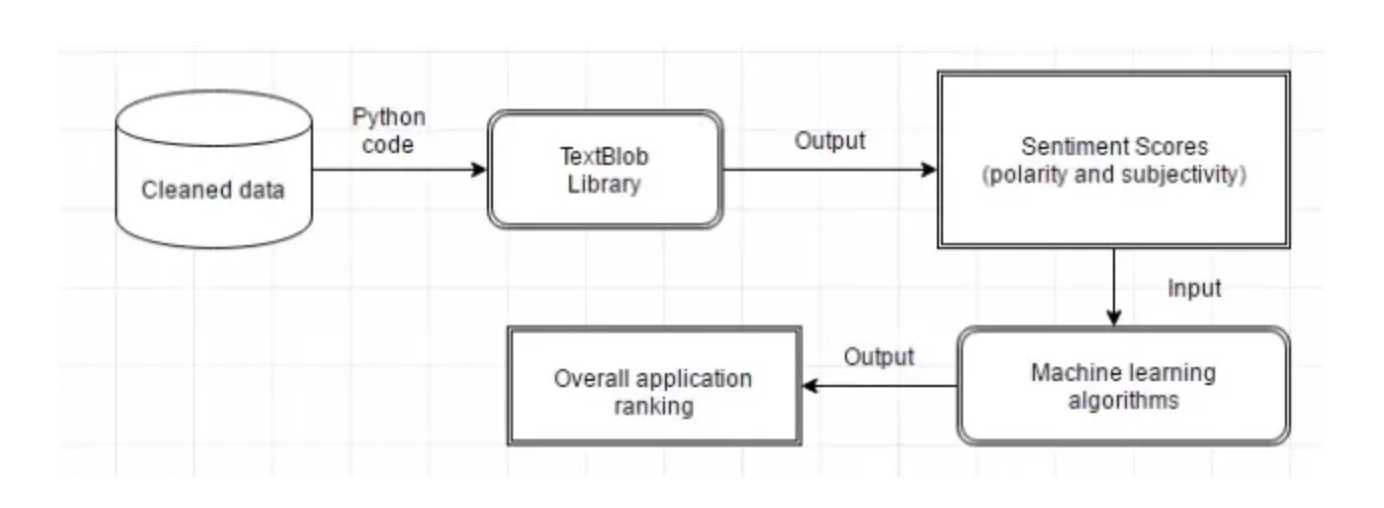](http://)

# Importing libraries and dataset

In [1]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
#libraries
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
#Checking the current directory of the project before providing the file path
import os
os.listdir('/kaggle/input/womens-ecommerce-clothing-reviews')

['Womens Clothing E-Commerce Reviews.csv']

In [6]:
df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
print(df.shape)

(23486, 11)


# Cleaning up the dataset

In [13]:
#quick look on the dataset
df.sample(5)

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
22785,836,53,Print looks odd,This is a well made blouse with a pretty neckl...,3,0,1,General,Tops,Blouses
20440,1095,55,Loved!,"Great fit, easy to dress up or down, lovely sh...",5,1,0,General,Dresses,Dresses
7817,867,57,Ribbed cardigan,This cardigan looked great on line but it is o...,1,0,2,General Petite,Tops,Knits
3445,1056,43,Casual pant,Very comfortable. im 5'2 so i ordered the peti...,5,1,3,General Petite,Bottoms,Pants


**The data set contains 23,486 rows of data. At first glance, the dataset has one column that appears to contain redundant index information.**

In [10]:
df = df.drop(columns = "Unnamed: 0")

**In addition, the column names could be improved and converted to snake case without spaces separated by an underscore, and all letters in lowercase.**

In [11]:
df.columns = (df.columns
                .str.replace(' ', '_')
                .str.lower()
             )
print(df.columns)

Index(['clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')


Understanding and correctly setting data types is important for effective data cleaning and analysis. The first thing, to be done is identifying data types in order to find mismatches. 

In [12]:
df.dtypes

clothing_id                 int64
age                         int64
title                      object
review_text                object
rating                      int64
recommended_ind             int64
positive_feedback_count     int64
division_name              object
department_name            object
class_name                 object
dtype: object

There are some mismatches here, because some columns should be stored as string instead of object.

**Object** data types can be memory-intensive, especially if the column contains long strings or if there are many unique string values. In contrast, using more specific data types like int or category can save memory and improve performance.

The algorithms that will be used for this analysis requiere specific data types for functioning properly, to analyse text it needs strings.

Also, **int64** data type 

In [18]:
#Converting texts stored as Object into strings

In [20]:
# Getting unique values from columns stored as Object to know which ones are Categories
unique_division_name = df['division_name'].unique()
unique_department_name = df['department_name'].unique()
unique_class_name = df['class_name'].unique()

print("Unique values in the unique_division_name:", unique_division_name, )

print("Unique values in the unique_department_name:", unique_department_name)

print("Unique values in the unique_class_name:", unique_class_name)

Unique values in the unique_division_name: ['Initmates' 'General' 'General Petite' nan]
Unique values in the unique_department_name: ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]
Unique values in the unique_class_name: ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' nan 'Chemises']


In [11]:
rows_with_na = df[df['review_text'].isna()]

print(rows_with_na)

       clothing_id  age title review_text  rating  recommended_ind  \
92             861   23   NaN         NaN       5                1   
93            1081   31   NaN         NaN       5                1   
98            1133   50   NaN         NaN       5                1   
135            861   35   NaN         NaN       4                1   
142           1126   35   NaN         NaN       5                1   
...            ...  ...   ...         ...     ...              ...   
23258          862   35   NaN         NaN       4                1   
23301          862   52   NaN         NaN       5                1   
23303          823   46   NaN         NaN       5                1   
23470         1104   39   NaN         NaN       5                1   
23480          862   35   NaN         NaN       5                1   

       positive_feedback_count   division_name department_name class_name  
92                           0  General Petite            Tops      Knits  
93     

In [12]:
#845 NAs out of 23486
total_rows = len(df)
missing_rows = df['review_text'].isna().sum()

percentage_missing = (missing_rows / total_rows) * 100
print(f'Percentage of Missing Values: {percentage_missing:.2f}%')

Percentage of Missing Values: 3.60%


The line `f"Percentage of Missing Values: {percentage_missing:.2f}%"` is using a formatted string literal, often referred to as an f-string, to create a string with placeholders for variables. This allows you to insert variable values directly into the string while controlling their formatting.

Let's break down the components of this f-string:

1. `"Percentage of Missing Values: "`: This is the static part of the string that doesn't change. It provides context for what you're calculating.

2. `{percentage_missing:.2f}`: This is a placeholder for the `percentage_missing` variable. The `.2f` inside the curly braces specifies that the variable should be formatted as a floating-point number with 2 decimal places.

3. `"%"`: This is the literal percentage sign that is added after the calculated value.

When you use an f-string like this, Python evaluates the expressions inside the curly braces and formats them according to the provided formatting instructions. In this case, `percentage_missing` is formatted as a floating-point number with 2 decimal places, and the final result is combined with the static text to create the formatted string.

For example, if `percentage_missing` is calculated to be 25.00, the resulting formatted string will be: "Percentage of Missing Values: 25.00%". This makes it easy to include calculated values in strings without needing to use string concatenation or manual formatting.

***code improvement: drop the NA lines just if they are less than 10% of the dataset***

In [13]:
# Drop rows with missing values
df = df.dropna(subset=['review_text'])

# Sentiment analysis

In [14]:
blob = TextBlob("This is a good example of a TextBlob")
blob.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [15]:
#to check if it is a string 
def sentiment_calc(review_text):
    try:
        return TextBlob(review_text).sentiment
    except:
        return None
    
df['sentiment'] = df['review_text'].apply(sentiment_calc)

In [16]:
df.sample(3)

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,sentiment
5939,873,61,Very flattering top,The photo does not do this top justice. the de...,5,1,0,General,Tops,Knits,"(0.26071428571428573, 0.495)"
18305,1022,55,Great fit!,These jeans are very comfortable. i really lik...,5,1,0,General,Bottoms,Jeans,"(0.30666666666666664, 0.58)"
4500,1038,41,So unique and so comfortable!,I love these jeans! when i saw them in my reta...,5,1,1,General,Bottoms,Jeans,"(0.2788194444444444, 0.4944444444444444)"


In [18]:
#load the descriptions into textblob
desc_blob = [TextBlob(desc) for desc in df['review_text']]

#df['review_text'].apply(lambda tweet: TextBlob(tweet).sentiment)

#[TextBlob(desc) for desc in df['review_text']]

#df['sentiment'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment)


#difeerencia en el código?

**.sentiment** returns a namedtuple of the form Sentiment(polarity, subjectivity).


In [20]:
#add the sentiment metrics to the dataframe
df['tb_Pol'] = [b.sentiment.polarity for b in desc_blob]
df['tb_Subj'] = [b.sentiment.subjectivity for b in desc_blob]

#load VADER
analyzer = SentimentIntensityAnalyzer()

#Add VADER metrics to dataframe
df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df['review_text']]
df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in df['review_text']]
df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in df['review_text']]
df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in df['review_text']]


#abajo la categorización es diferente? por que? cuál es la diferencia?
df.head(3)

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,sentiment,tb_Pol,tb_Subj,compound,neg,neu,pos
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"(0.6333333333333333, 0.9333333333333332)",0.633333,0.933333,0.8932,0.000,0.319,0.681
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"(0.33958333333333335, 0.7250000000000001)",0.339583,0.725000,0.9729,0.000,0.702,0.298
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"(0.07367494824016563, 0.35629399585921323)",0.073675,0.356294,0.9208,0.025,0.831,0.144


In [21]:
# Set display option to show full content of the text column
pd.set_option('display.max_colwidth', None)

In [ ]:
# Filter the DataFrame where 0.65 > df['pos'] is FALSE
filtered_df = df[df['pos'] >= 0.65]

print(filtered_df[['review_text', 'rating', 'neg', 'pos', 'neu']])

#[['review_text', 'rating', 'neg', 'pos', 'neu', 'positive_feedback_count']]

# Visualization

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

**Categorizing customer's reviews into Positive and Negative sentiments and plotting it.**

In [ ]:
bloblist = list()

df_str=df['review_text']
for row in df_str:
    blob = TextBlob(row)
    bloblist.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity = pd.DataFrame(bloblist, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_polarity):
    if df_polarity['sentiment'] > 0:
        val = "Positive"
    elif df_polarity['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_polarity['Sentiment_Type'] = df_polarity.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity)

# WordCloud for Description column

Counting frequency of words of customer's reviews.

In [ ]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import sent_tokenize, word_tokenize
from stop_words import get_stop_words
import re

In [ ]:
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

desc_lower = df['review_text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
desc_remove_pun = re.sub('[^A-Za-z]+', ' ', desc_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_desc = word_tokenize(desc_remove_pun)
filtered_sentence_desc = [w_desc for w_desc in word_tokens_desc if not w_desc in stop_words]
filtered_sentence_desc = []
for w_desc in word_tokens_desc:
    if w_desc not in stop_words:
        filtered_sentence_desc.append(w_desc)

# Remove characters which have length less than 2  
without_single_chr_desc = [word_desc for word_desc in filtered_sentence_desc if len(word_desc) > 2]

# Remove numbers
cleaned_data_desc = [word_desc for word_desc in without_single_chr_desc if not word_desc.isnumeric()]        

# Calculate frequency distribution
word_dist_desc = nltk.FreqDist(cleaned_data_desc)
rslt_desc = pd.DataFrame(word_dist_desc.most_common(top_N),
                    columns=['Word', 'Frequency'])

#print(rslt_desc)
#plt.style.use('ggplot')
#rslt.plot.bar(rot=0)


plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt_desc.head(7)) #what is head() doing there ?

In [ ]:
from wordcloud import WordCloud
#import nltk
#from nltk.corpus import stopwords
#from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(rslt_desc,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [ ]:
wc(rslt_desc,'black','Frequent Words' )

# Conclusiones

Posibles aplicacionees: comparación entre liberarias y ver cuál es más acertada https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair

Sources: https://medium.com/swlh/simple-sentiment-analysis-for-nlp-beginners-and-everyone-else-using-vader-and-textblob-728da3dbe33d
https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524
https://medium.com/analytics-vidhya/sentiment-analysis-using-textblob-ecaaf0373dff


https://analyticsindiamag.com/how-to-obtain-a-sentiment-score-for-a-sentence-using-textblob/


Thanks. Any suggestions are welcomed :)